## Вводная часть
### Цели и задачи
**Основная задача** - выявить закономерности, определяющие успешность игры для проведение рекламной компании. Успешность - число продаж игры.
### План работ
1. Изучение имеющегося датасета.
2. Предобработка данных:
    2.1. Приведение к единому стилю.
    2.2. Выявление дублей.
    2.3. Выявление аномалий.
    2.4. Заполнение пропусков.
3. Анализ данных.
4. Общий вывод и рекомендации.

### Описание данных
**Name** — название игры   
**Platform** — платформа   
**Year_of_Release** — год выпуска   
**Genre** — жанр игры   
**NA_sales** — продажи в Северной Америке (миллионы проданных копий)   
**EU_sales** — продажи в Европе (миллионы проданных копий)   
**JP_sales** — продажи в Японии (миллионы проданных копий)   
**Other_sales** — продажи в других странах (миллионы проданных копий)   
**Critic_Score** — оценка критиков (максимум 100)   
**User_Score** — оценка пользователей (максимум 10)   
**Rating** — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

## Основная часть
### Изучение датасета и подготовка данных
До начала работ импортирую все необходимые модули и библиотеки. Далее сохраню данные в датасет, с которым уже и буду работать.

In [1]:
import pandas as pd
from scipy import stats as st
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('games.csv') # Загружаю файл с данными

Посмотрю на общую информацию о файле.

In [3]:
df.info() # Общая информация о датасете
df.head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Сразу видно, что необходимо переименовать столбцы, привести данные к нужным типам. Пропусков не так много как могло бы быть, но и с ними нужно решить.

In [4]:
df.columns = df.columns.str.lower() # Привожу имена столбцов к lower_case
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
print('Полных дубликатов:', df.duplicated().sum())

Полных дубликатов: 0


Полных дубликатов не обнаружено. Далее посмотрю по отдельности все столбцы и внесу корректировки где необходимо.
#### name

In [6]:
# Общая инфо по столбцу
df['name'].describe()

# Проверю что уники действительно уники
df.query('name == "Need for Speed: Most Wanted"')

# Проверю что за игры без названия
df.query('name.isna()')

# Удалю строки с пропусками
df = df.dropna(subset=['name'])

df.info() # Проверка

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


Данные в порядке. Удалил две строки, где кроме данных о продажах и года выпуска не было ничего. Для анализа такие не годятся, да и удаление их не повлияет на анализ в целом.

#### platform

In [7]:
df['platform'].value_counts()

PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
NES       98
GB        98
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: platform, dtype: int64

Тут все в порядке.

#### year_of_release

In [8]:
# Общая информация
display(df['year_of_release'].describe())
display(df['year_of_release'].value_counts())
df.query('year_of_release.isna()').head(20)

count    16444.000000
mean      2006.486256
std          5.875525
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2016.000000
Name: year_of_release, dtype: float64

2008.0    1427
2009.0    1426
2010.0    1255
2007.0    1197
2011.0    1136
2006.0    1006
2005.0     939
2002.0     829
2003.0     775
2004.0     762
2012.0     653
2015.0     606
2014.0     581
2013.0     544
2016.0     502
2001.0     482
1998.0     379
2000.0     350
1999.0     338
1997.0     289
1996.0     263
1995.0     219
1994.0     121
1993.0      60
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1989.0      17
1983.0      17
1990.0      16
1987.0      16
1988.0      15
1985.0      14
1984.0      14
1980.0       9
Name: year_of_release, dtype: int64

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
627,Rock Band,X360,NaN,Misc,1.93,0.33,0.00,0.21,92.0,8.2,T
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.00,0.07,73.0,tbd,E
678,LEGO Indiana Jones: The Original Adventures,Wii,NaN,Action,1.51,0.61,0.00,0.21,78.0,6.6,E10+
719,Call of Duty 3,Wii,NaN,Shooter,1.17,0.84,0.00,0.23,69.0,6.7,T
805,Rock Band,Wii,NaN,Misc,1.33,0.56,0.00,0.20,80.0,6.3,T


Пропусков чуть больше 1.5%, а корректно заполнить их возможно только вручную. Поэтому я пожертвую этой частью данных, просто удалю.   
Оставшиеся значения преобразую в тип ```int```, т.к. указан только год.

In [9]:
df = df.dropna(subset=['year_of_release'])
df['year_of_release'] = df['year_of_release'].apply(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.5+ MB


#### genre

In [10]:
df['genre'].describe()
df['genre'].value_counts()

Action          3307
Sports          2306
Misc            1721
Role-Playing    1481
Shooter         1296
Adventure       1293
Racing          1226
Platform         878
Simulation       857
Fighting         837
Strategy         673
Puzzle           569
Name: genre, dtype: int64

#### sales

In [11]:
for sale in ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']:
    display(df[sale].describe())

count    16444.000000
mean         0.264012
std          0.818378
min          0.000000
25%          0.000000
50%          0.080000
75%          0.240000
max         41.360000
Name: na_sales, dtype: float64

count    16444.000000
mean         0.145930
std          0.506716
min          0.000000
25%          0.000000
50%          0.020000
75%          0.110000
max         28.960000
Name: eu_sales, dtype: float64

count    16444.000000
mean         0.078487
std          0.311100
min          0.000000
25%          0.000000
50%          0.000000
75%          0.040000
max         10.220000
Name: jp_sales, dtype: float64

count    16444.000000
mean         0.047594
std          0.188005
min          0.000000
25%          0.000000
50%          0.010000
75%          0.030000
max         10.570000
Name: other_sales, dtype: float64

#### score
В оценках критиков и пользователей есть большое число пропущенных значений. Т.к. в данном случае отсутствие значения не указывает на совсем высокий или низкий рейтинг, то просто заменить его каким-либо другим я тоже не могу. Тем не менее посмотрю на оценки в различных разрезах, чтобы лучше понять ситуацию.

In [12]:
display(df.query('critic_score.isna() and not user_score.isna()').head(20))
display(df.query('critic_score.isna() and user_score == "tbd"'))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.00,0.66,NaN,tbd,E
255,Call of Duty: Advanced Warfare,PS3,2014,Shooter,1.56,1.93,0.19,0.68,NaN,4.8,M
263,Call of Duty: Advanced Warfare,X360,2014,Shooter,2.77,1.11,0.00,0.40,NaN,4.9,M
264,FIFA 15,PS3,2014,Sports,0.58,3.02,0.04,0.64,NaN,4.5,E
291,World Soccer Winning Eleven 9,PS2,2005,Sports,0.12,2.26,0.90,0.77,NaN,8.2,E
359,Just Dance 2014,Wii,2013,Misc,1.88,1.39,0.00,0.31,NaN,6.2,E10+
437,Club Penguin: Elite Penguin Force,DS,2008,Adventure,1.87,0.97,0.00,0.30,NaN,8,E
494,FIFA 15,X360,2014,Sports,0.79,1.92,0.00,0.21,NaN,4.2,E
505,Imagine: Babyz,DS,2007,Simulation,1.30,1.26,0.00,0.31,NaN,7.7,E
519,Finding Nemo,GBA,2003,Action,1.59,1.05,0.04,0.14,NaN,7,E


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
520,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
718,Just Dance Kids,Wii,2010,Misc,1.52,0.54,0.0,0.18,NaN,tbd,E
726,Dance Dance Revolution X2,PS2,2009,Simulation,1.09,0.85,0.0,0.28,NaN,tbd,E10+
881,Who wants to be a millionaire,PC,1999,Misc,1.94,0.00,0.0,0.00,NaN,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16655,Summer Athletics,PC,2008,Sports,0.00,0.01,0.0,0.00,NaN,tbd,NaN
16672,Metal Gear Solid V: The Definitive Experience,XOne,2016,Action,0.01,0.00,0.0,0.00,NaN,tbd,M
16688,Outdoors Unleashed: Africa 3D,3DS,2011,Sports,0.01,0.00,0.0,0.00,NaN,tbd,T
16704,Plushees,DS,2008,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


TBD = to be determine, т.е. рейтинг отсутствует. Т.к. запись tbd будет мешать анализу, являясь по сути отсутствующим значением, заменю его на NaN.

In [13]:
df['user_score'] = df['user_score'].replace('tbd', np.nan)
df.info() # Проверка
df['user_score'] = df['user_score'].astype(float) # К числовому типу

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.5+ MB


Подсчет суммарных продаж по всем регионам.

In [14]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
df['total_sales'].describe() #Проверка

count    16444.000000
mean         0.536023
std          1.558786
min          0.000000
25%          0.060000
50%          0.170000
75%          0.470000
max         82.540000
Name: total_sales, dtype: float64

#### rating

In [15]:
display(df['rating'].describe())
display(df['rating'].value_counts())
display(df['rating'].isna().sum())

count     9768
unique       8
top          E
freq      3921
Name: rating, dtype: object

E       3921
T       2905
M       1536
E10+    1393
EC         8
K-A        3
AO         1
RP         1
Name: rating, dtype: int64

6676

В столбце есть много отсутствующих значений. При этом также есть уник RP, что означает rating pending(ожидает рейтинга). Т.к. тут суть одианкова - рейтинга еще нет, то вполне могу заменить пустые значения на RP.

In [16]:
df['rating'] = df['rating'].fillna('RP')
df['rating'].describe()

count     16444
unique        8
top          RP
freq       6677
Name: rating, dtype: object

#### Вывод 1
При подготовке данных выявил и поправил следующие моменты:   
- привел названия столбцов к нижнему регистру
- удалил строки с отсутствующим названием игр и неизвестной датой выхода
- заменил в пользовательской оценке значения TBD на NaN
- заполнил пропуски в rating на RP
- посчитал суммарные продажи

Такое количество пропусков в оценках, думаю, связано с тем, что система оценок и рейтинги игр появились сравнительно недавно, а игры в датасете есть и весьма старые, которые не успели/не получали оценок ни пользователей ни критиков позднее.

### Исследовательский анализ данных
#### Динамика продаж
Сперва посмотрю на динамику выхода игр по годам. Меня интересует только 2016г., но тренд важен.

,name
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15


<AxesSubplot:title={'center':'График выхода игр по годам'}, xlabel='Дата выхода', ylabel='Количество'>

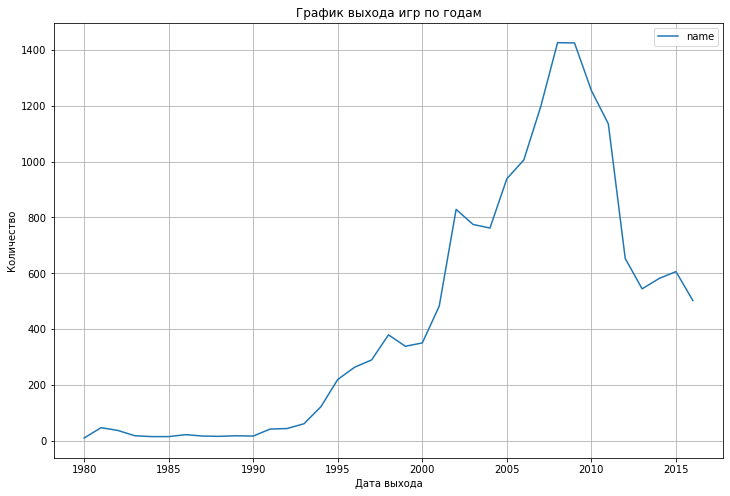

In [17]:
release_stat = df.pivot_table(index = 'year_of_release', values = 'name', aggfunc = 'count')
display(release_stat)

# Отображу на графике
release_stat.plot(
    xlabel = 'Дата выхода',
    ylabel = 'Количество',
    title = 'График выхода игр по годам',
    figsize = (12, 8),
    grid = True
)

На графике четко виден рост выпуска игр с начала 90х годов. Объясняется развитием технологий: сперва переход с игровых автоматов на PC и приставки, далее развитие графики и носителей, совершенствование приставок и технологий производства. Также, полагаю, улучшается доступность игровых консолей и ПК, а значит увеличивается рынок сбыта.   
Далее не стоит списывать со счетов развитие технологий широкополосного доступа в интернет, развитие мобильных платформ (Symbian, iOS, Android, J2EE и т.д.)   
Спад после 2009г. можно объяснить не таким прорывным совершенствованием технологий как ранее.   
   
#### Популярность платформ
Далее смотрю на популярность платформ.

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


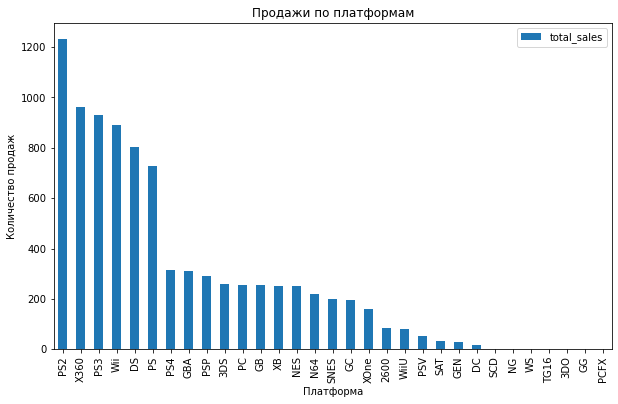

In [18]:
pop_platform = df.pivot_table(index = 'platform', values = 'total_sales', aggfunc = 'sum').sort_values(by='total_sales', ascending=False)
pop_platform.plot(
    kind = 'bar',
    figsize = (10, 6),
    title = 'Продажи по платформам',
    xlabel = 'Платформа',
    ylabel = 'Количество продаж'
)
display(pop_platform.head(10))

Самыми популярнымы платформами являются:   
1. PS2
2. Xbox 360 (X360)
3. PS3
4. Wii
5. DS
6. PS

Чтобы понять какие платформы сейчас актуальны и выбрать актуальный период для анализа, нужно понять время, за которое платформа устаревает. Для этого построю распределения продаж игр по годам.

/opt/anaconda3/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:386: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


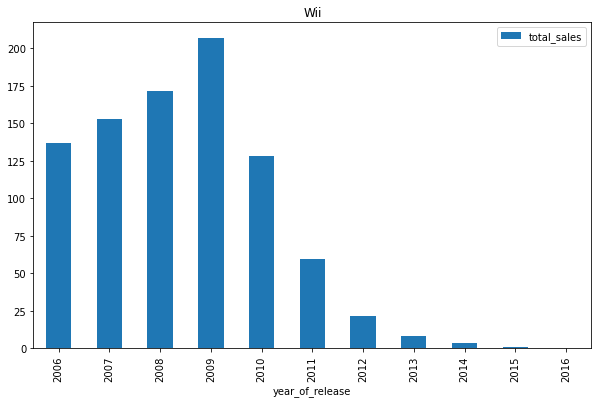

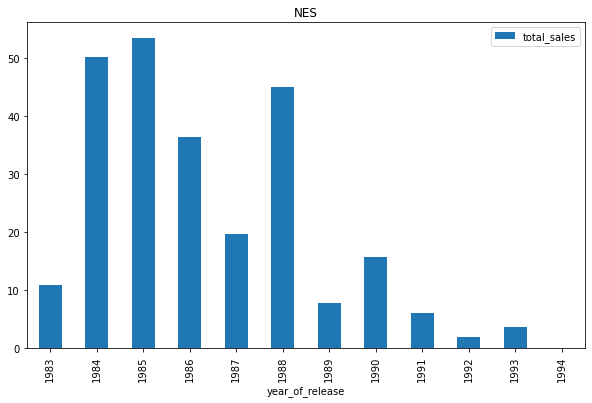

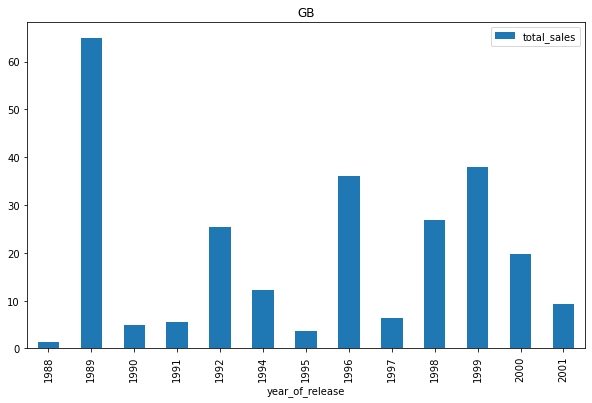

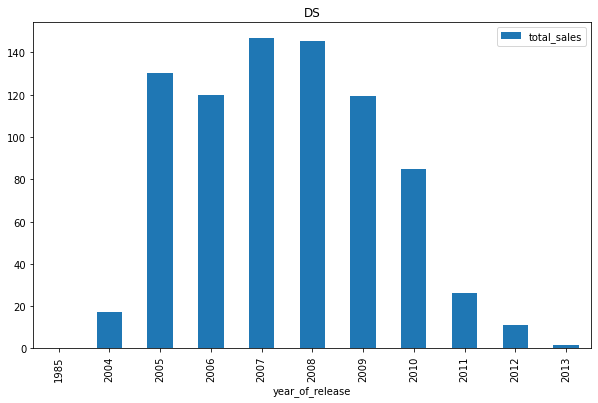

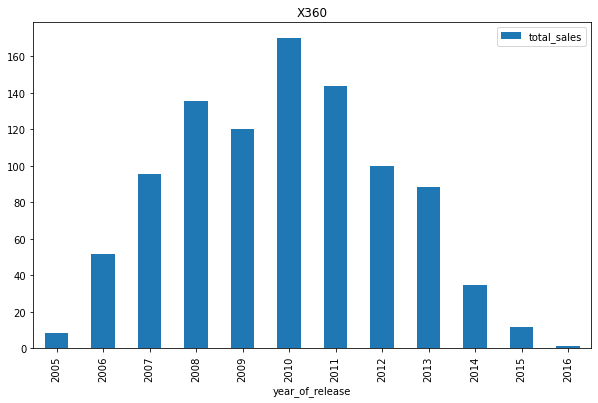

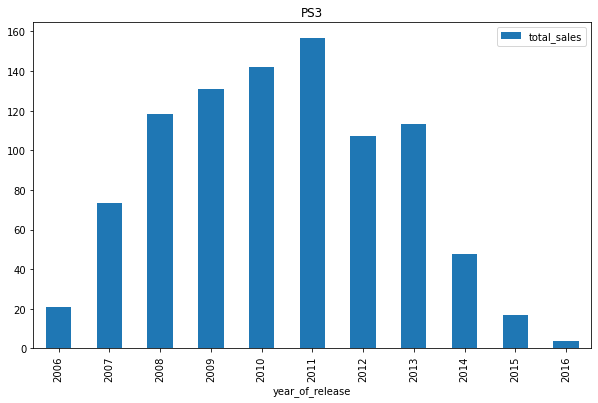

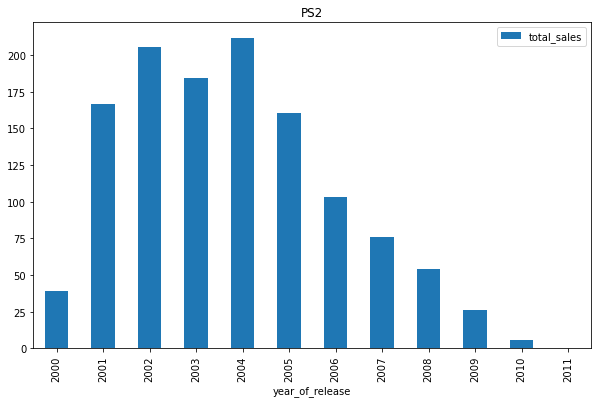

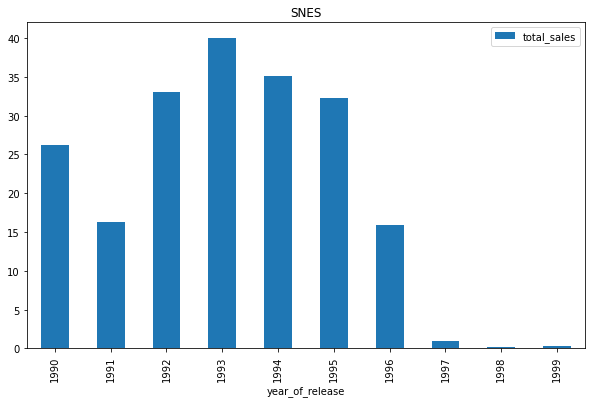

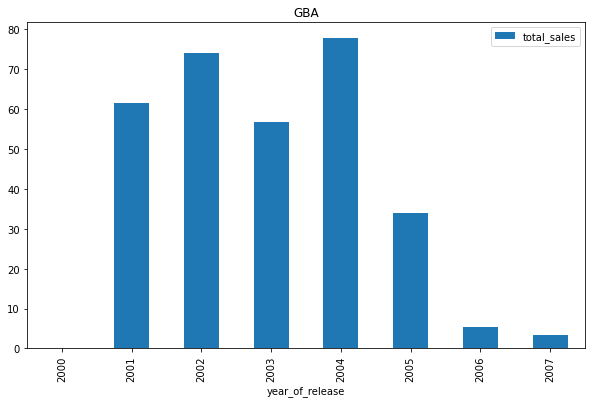

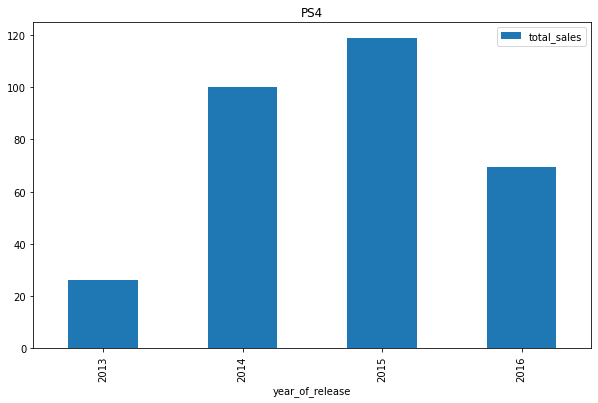

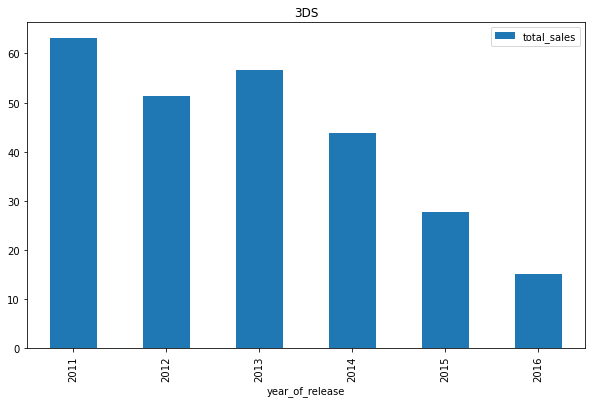

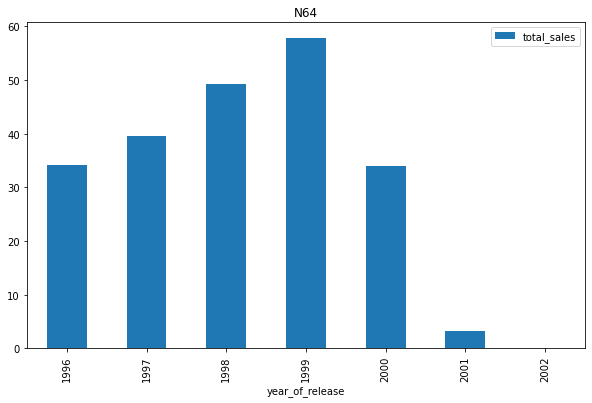

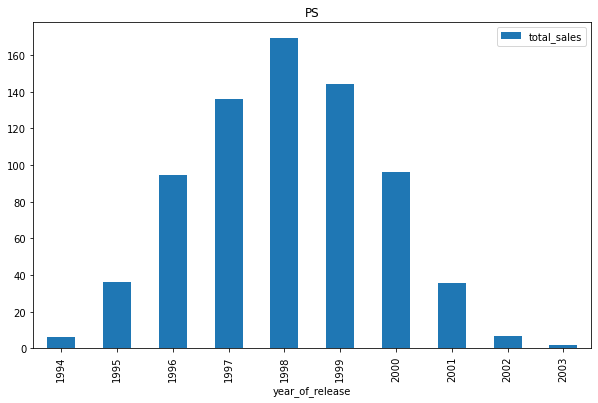

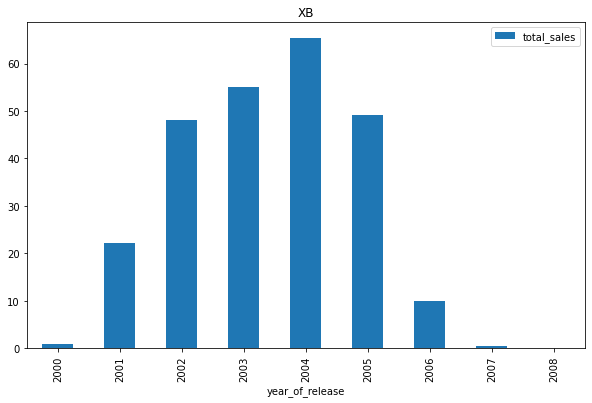

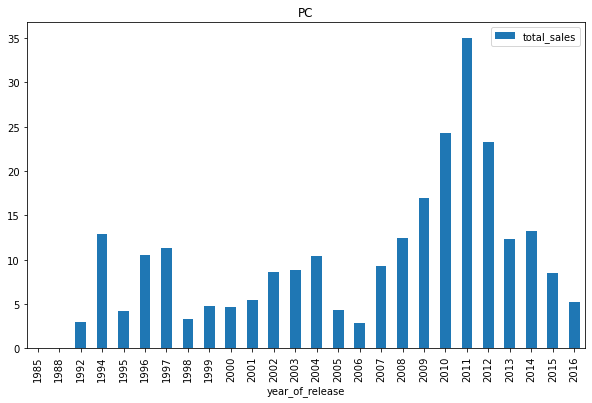

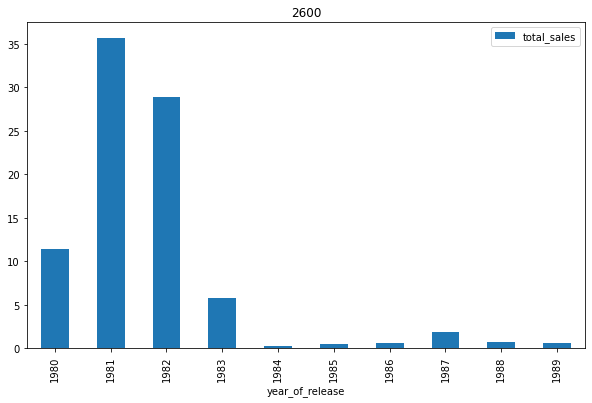

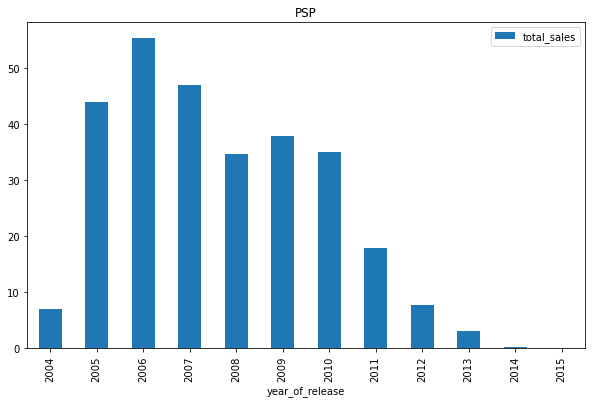

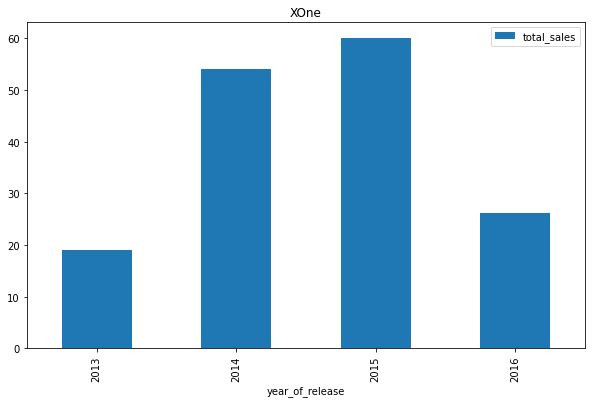

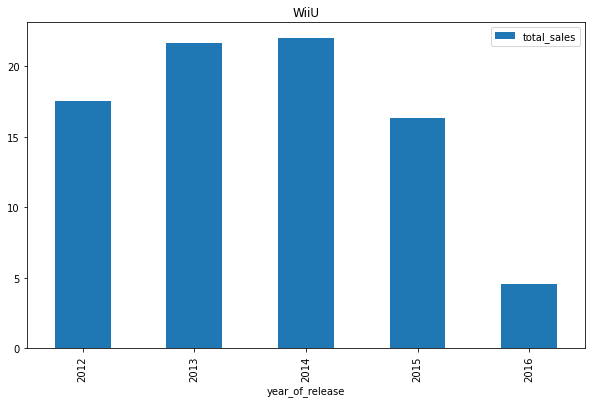

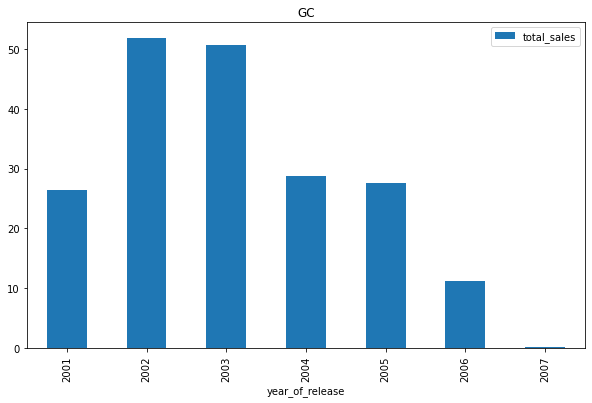

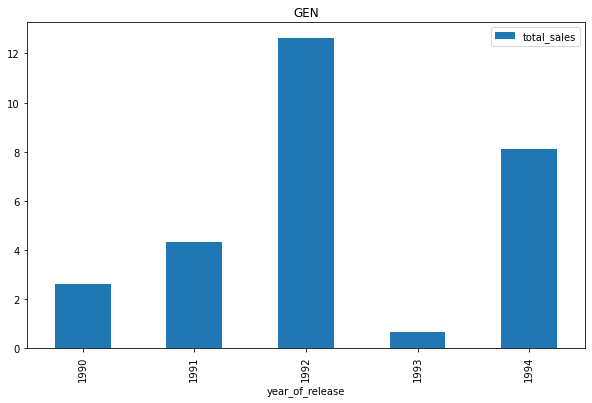

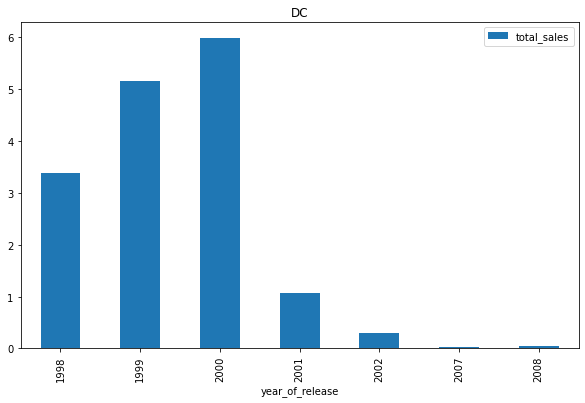

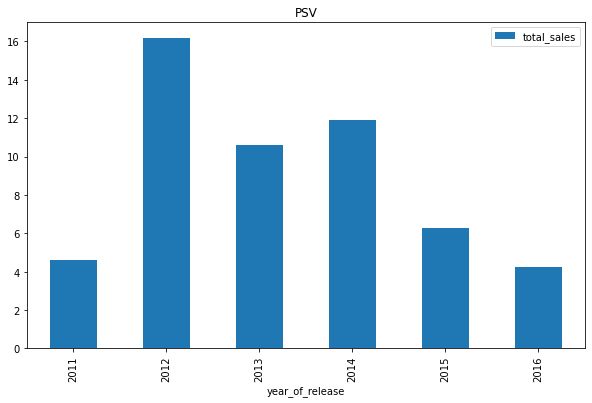

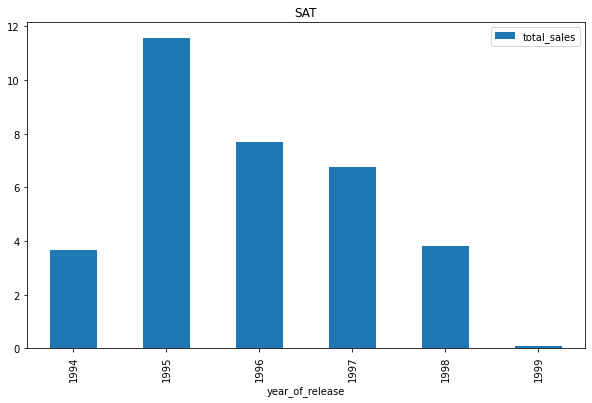

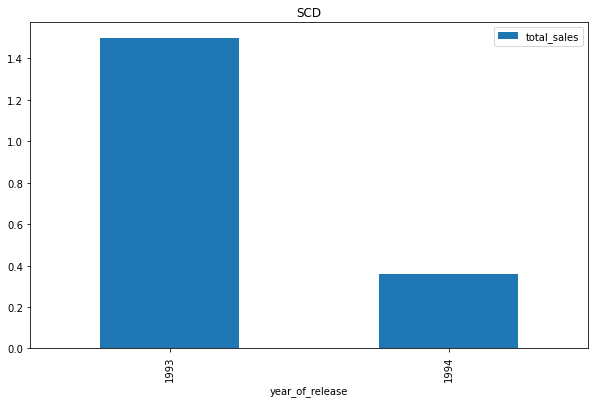

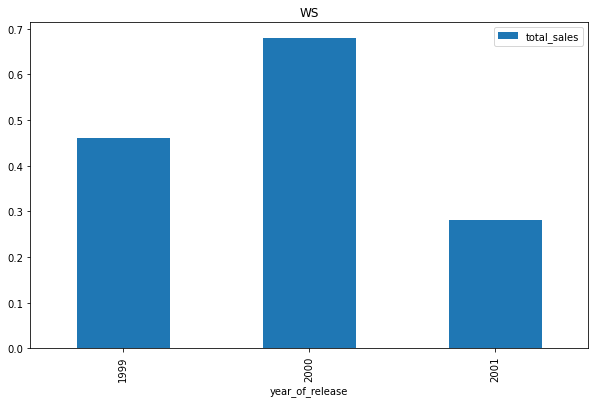

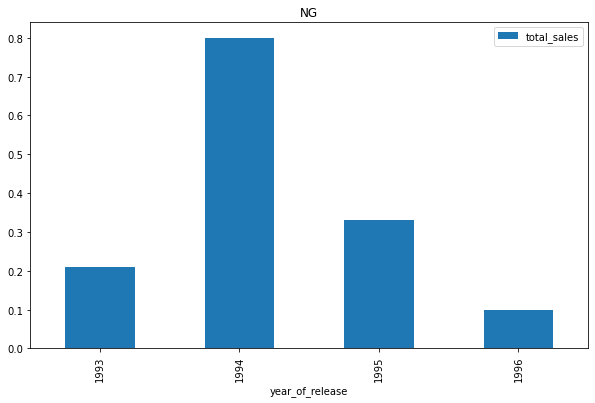

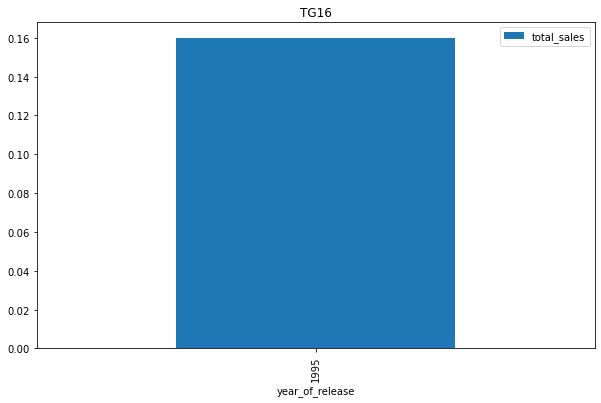

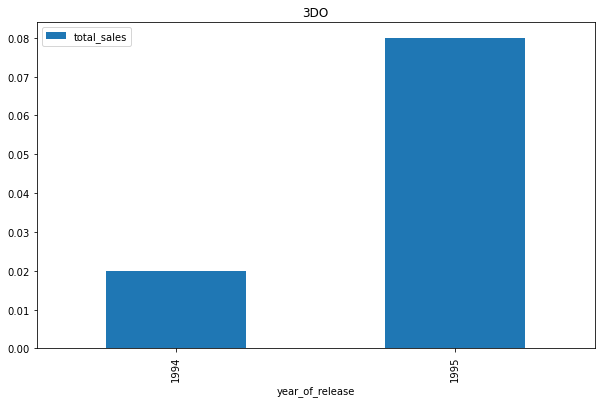

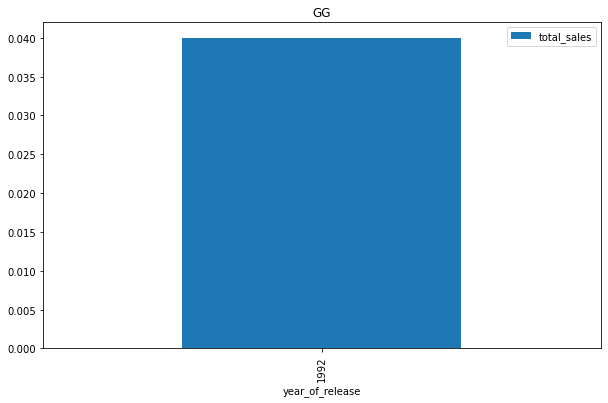

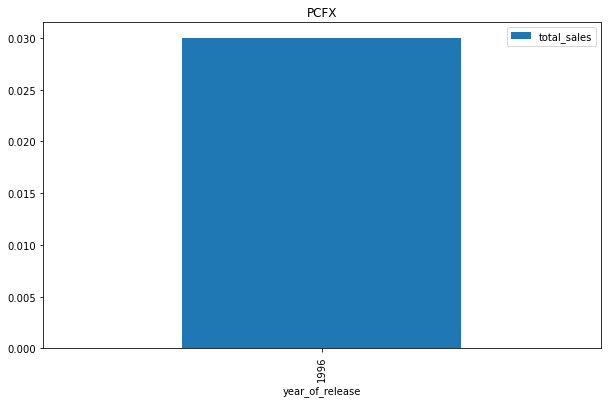

In [19]:
for platform in df['platform'].unique():
    df[df['platform'] == platform].pivot_table(
        index = 'year_of_release',
        values = 'total_sales',
        aggfunc = 'sum'
    ).plot(
        kind = 'bar',
        figsize = (10, 6),
        title = platform
    )

Выходит, что от появления платформы до ее полного устаревания проходит в среднем 8-10 лет, при этом на пике платформа держится 4-6 лет.
В 2016 году 5 топ-платформ по продажам уже утратили свою актуальность. Их место заняли PS4, PC, 3DS, PS Vita, Xbox One, Wii U.
Для дальнейшего исследования я возьму данные игр, которые выходили с 2013г., т.е. в 2016г. еще были актуальны.

In [20]:
# Выбираю игры с 2013гв.
df_actual = df.query('year_of_release > 2012')
display(df_actual.head(10))
display(df_actual.info())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,RP,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,RP,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,RP,11.68
60,Call of Duty: Ghosts,X360,2013,Shooter,6.73,2.56,0.04,0.91,73.0,2.6,M,10.24
69,Call of Duty: Ghosts,PS3,2013,Shooter,4.10,3.63,0.38,1.25,71.0,2.6,M,9.36
72,Minecraft,X360,2013,Misc,5.70,2.65,0.02,0.81,NaN,NaN,RP,9.18
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2233 entries, 16 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2233 non-null   object 
 1   platform         2233 non-null   object 
 2   year_of_release  2233 non-null   int64  
 3   genre            2233 non-null   object 
 4   na_sales         2233 non-null   float64
 5   eu_sales         2233 non-null   float64
 6   jp_sales         2233 non-null   float64
 7   other_sales      2233 non-null   float64
 8   critic_score     991 non-null    float64
 9   user_score       1192 non-null   float64
 10  rating           2233 non-null   object 
 11  total_sales      2233 non-null   float64
dtypes: float64(7), int64(1), object(4)
memory usage: 226.8+ KB


None

In [21]:
# Создам список из топа актуальных платформ
act_top_platforms = ['PS4', '3DS', 'XOne', 'PSV', 'WiiU', 'PC']
# Выбираю строки из нового датасета только по акутальным платформам
df_act_top_platforms = df_actual.query('platform in @act_top_platforms')
df_act_top_platforms['total_sales'].describe()

count    1604.000000
mean        0.469925
std         1.150981
min         0.010000
25%         0.030000
50%         0.100000
75%         0.360000
max        14.630000
Name: total_sales, dtype: float64

Занятно, что 75% процентов продаж количественно укладываются в 360 000 копий, но максимальное значение - 14 млн.
Это явно выбросы (какие-то ААА игры-шедевры).   
Посмотрю на продажи в разрезе платформ.

In [22]:
df_act_top_platforms.groupby('platform')['total_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DS,303.0,0.472772,1.381347,0.01,0.04,0.09,0.280,14.60
PC,189.0,0.208624,0.352304,0.01,0.03,0.08,0.230,3.05
PS4,392.0,0.801378,1.609456,0.01,0.06,0.20,0.730,14.63
PSV,358.0,0.092151,0.153816,0.01,0.02,0.04,0.110,1.96
WiiU,115.0,0.562000,1.038778,0.01,0.06,0.20,0.595,7.09
XOne,247.0,0.645020,1.036139,0.01,0.06,0.22,0.685,7.39


Построю диаграмму размаха по этим данным.

(0.0, 2.0)

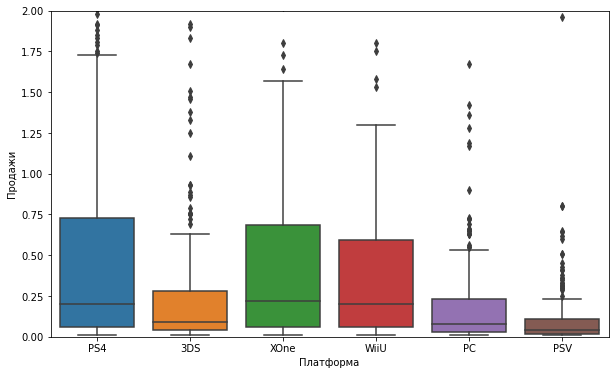

In [23]:
plt.figure(figsize = (10, 6))
sns.boxplot(data = df_act_top_platforms, x = 'platform', y = 'total_sales')
plt.xlabel('Платформа')
plt.ylabel('Продажи')
plt.ylim(0, 2) # Закомментировать для просмотра на всех данных

При построении диаграммы по всем данным (без ограничений), график становится абсолютно нечитаемым из-за ряда выбросов - топ игр с огромным числом продаж.   
По графику видно, что лидерами продаж в среднем являются игры ддля домашних консолей - PS4 и Xbox One, а следом за ними портативная консоль Wii U. Интересно что Wii U может быть и домашней консолью тоже.   
PC показыавет достаточно скромный результат, примерно на равне с 3DS. Хуже же всех себя показала портативная консоль PS Vita.

#### Влияние отзывов на продажи
Посмотрю, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков.   
Для примера возьму Xbox One.

Корреляция между оценками пользователей и продажами -0.06892505328279414
Корреляция между оценками критиков и продажами 0.4169983280084017


<AxesSubplot:xlabel='Оценка критиков', ylabel='Продажи'>

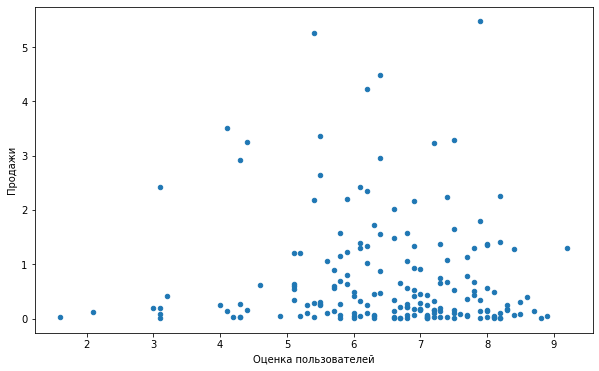

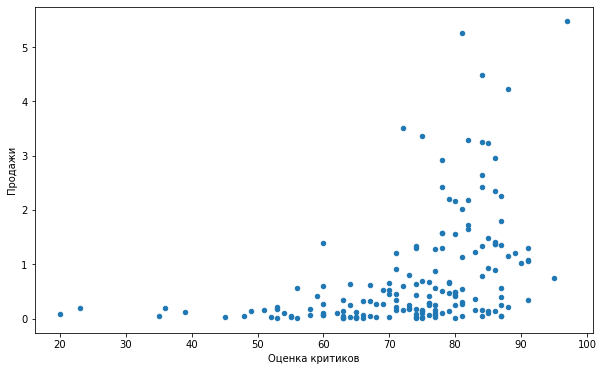

In [24]:
# Выбираю только игры Xbox One
df_xone = df_act_top_platforms.query('platform == "XOne"')

# Посмотрю корреляции
print('Корреляция между оценками пользователей и продажами', df_xone['user_score'].corr(df_xone['total_sales']))
print('Корреляция между оценками критиков и продажами', df_xone['critic_score'].corr(df_xone['total_sales']))

# Диаграммы рассеивания
df_xone.plot(
    kind = 'scatter',
    x = 'user_score',
    y = 'total_sales',
    figsize = (10, 6),
    xlabel = 'Оценка пользователей',
    ylabel = 'Продажи'
)
plt.show
df_xone.plot(
    kind = 'scatter',
    x = 'critic_score',
    y = 'total_sales',
    figsize = (10, 6),
    xlabel = 'Оценка критиков',
    ylabel = 'Продажи'
)

**Промежуточный вывод**   
Корреляция между оценкой критиков и продажами достаточно слабая, а между продажами и оценками пользователей вовсе отсутствует.   
Посмотрю сохраняется ли ситуация для остальных топ платформ.

In [25]:
# Выведу значения корреляций
for platform in df_act_top_platforms['platform'].unique():
    plat = df_act_top_platforms.query('platform == @platform')
    user_corr = plat['user_score'].corr(plat['total_sales'])
    critic_corr = plat['critic_score'].corr(plat['total_sales'])
    
    print('Для', platform)
    print('Корреляция между оценкой пользователей и продажами равна', user_corr)
    print('Корреляция между оценкой критиков и продажами равна', critic_corr)
    print()

Для PS4
Корреляция между оценкой пользователей и продажами равна -0.031957110204556424
Корреляция между оценкой критиков и продажами равна 0.40656790206178095

Для 3DS
Корреляция между оценкой пользователей и продажами равна 0.24150411773563016
Корреляция между оценкой критиков и продажами равна 0.3570566142288103

Для XOne
Корреляция между оценкой пользователей и продажами равна -0.06892505328279414
Корреляция между оценкой критиков и продажами равна 0.4169983280084017

Для WiiU
Корреляция между оценкой пользователей и продажами равна 0.4193304819266187
Корреляция между оценкой критиков и продажами равна 0.3764149065423912

Для PC
Корреляция между оценкой пользователей и продажами равна -0.0938418695247674
Корреляция между оценкой критиков и продажами равна 0.19603028294369382

Для PSV
Корреляция между оценкой пользователей и продажами равна 0.0009424723319108626
Корреляция между оценкой критиков и продажами равна 0.2547423503068656



Почти везде корреляция между оценкой пользователей и продажами отсутствует или очень слабая, кроме Wii U - у нее корреляция посильнее. А вот между оценкой критиков и продажами корреляция есть везде, хоть и не сильная.   
Значит пользователи больше ориентируются на оценку критиков. Уверен, это из-за двух причин:   
1. Оценка критиков появляется раньше, иногда до официального выхода игры.
2. Оценка пользователей меняется с течением времени просто из-за количества этих самых оценок.

#### Распределение игр по жанрам
Посмотрю на общее распределение игр по жанрам.

<AxesSubplot:xlabel='genre'>

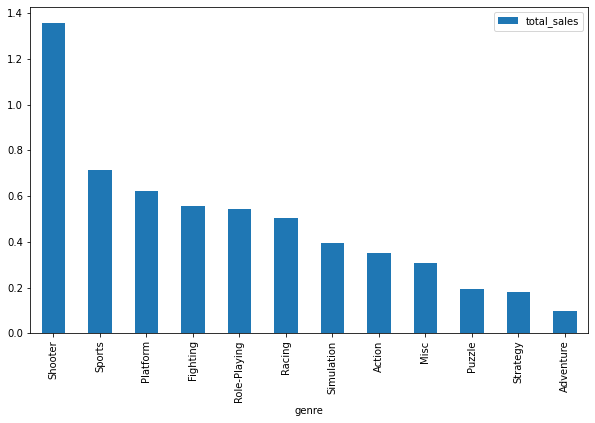

In [26]:
df_act_top_platforms.pivot_table(
    index = 'genre',
    values = 'total_sales',
    #aggfunc = 'sum'
).sort_values(by = 'total_sales', ascending = False).plot(
    kind = 'bar',
    figsize = (10, 6)
)

Лидирующие позиции занимают жанры шутер, спортивные симуляторы, платформеры. Хуже всего с продажами игр жанра приключения. Большинство игр этого жанра - инди (по крайней мере если экстраполировать ситуацию на сейчас), то есть выпускаются независимыми разработчиками, с очень малым бюджетом, ну и в общем не ориентированы на безумные продажи.

#### Вывод 2
Исследовательский анализ помог выявить следующие моменты:   
- с 90х годов был резкий подъем производства и продаж видеоигр. После 2008г. наблюдается сильный спад, скорее всего связанный с сильным замеделнием роста технологий
- самые популярные платформы за все время по имеющимся данным: PS 1-3, Xbox 360, Wii, DS
- в среднем платформа актуальна 8-10 лет
- существует корреляция между оценкой игры критиками и количеством продаж. Пользовательские оценки на продажи влияют почти никак
- самые продаваемые жанры: экшн, шутер, РПГ

### Портрет пользователя
Определю для пользователей Северной Америки, Европы и Японии самые популярные платформы и жанры, а так же как влияет рейтинг ESRB на продажи.   
#### Пользователи Северной Америки

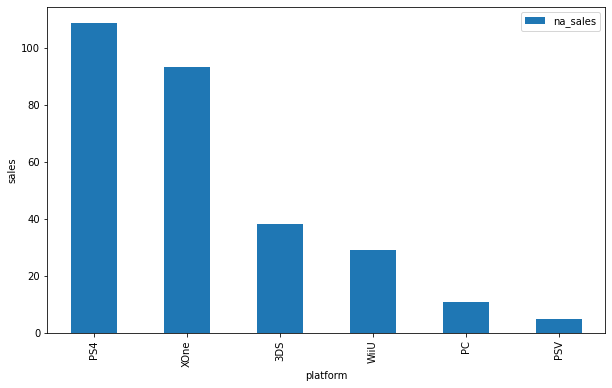

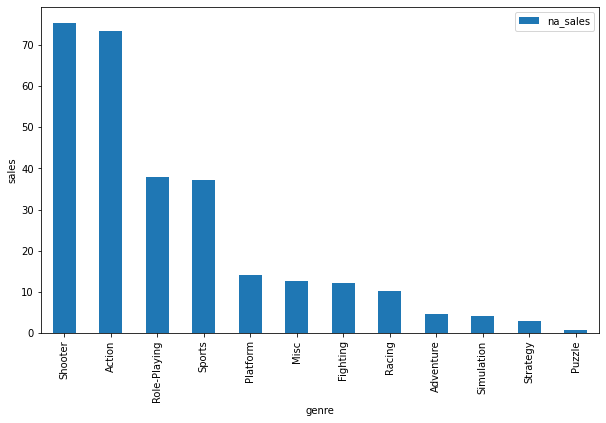

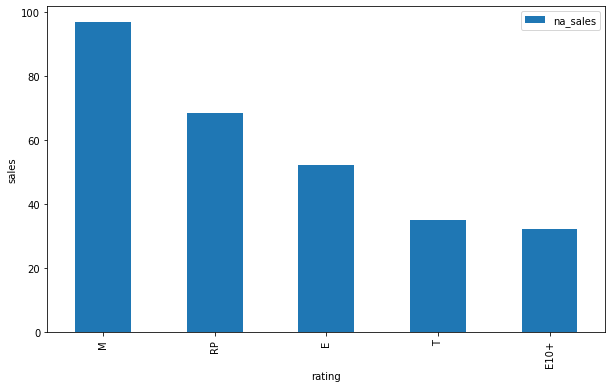

In [27]:
#  Создаю список колонок для графиков
list_for_bar = ['platform', 'genre', 'rating']

# Отрисовка графиков
for i in list_for_bar:
    df_act_top_platforms.pivot_table(
        index = i,
        values = 'na_sales',
        aggfunc = 'sum'
    ).sort_values(
        by = 'na_sales',
        ascending = False
    ).plot(
        kind = 'bar',
        figsize = (10, 6),
        xlabel = i,
        ylabel = 'sales',
    )

- топ платформ в Северной Америке: PS4, Xbox One, 3DS, PC и Wii U
- по жанрам топ: экшн, шутер, РПГ, спортивные симуляторы и платформеры
- по рейтингу: игры 18+ (М), без рейтинга, для всех (Е), 16+ (Т), 10+ (Е10+)

#### Пользователи Европы

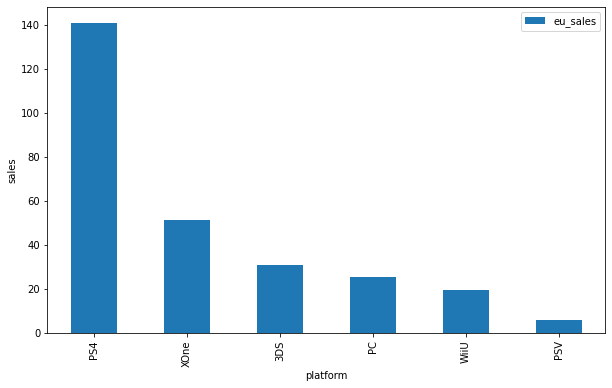

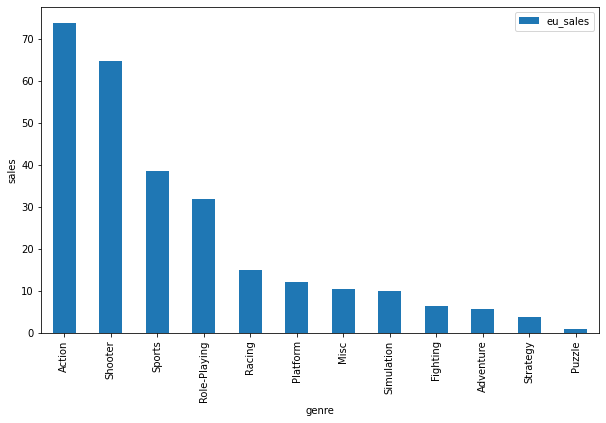

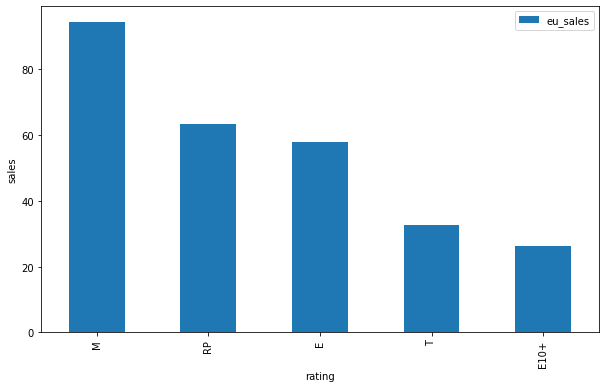

In [28]:
# Отрисовка графиков
for i in list_for_bar:
    df_act_top_platforms.pivot_table(
        index = i,
        values = 'eu_sales',
        aggfunc = 'sum'
    ).sort_values(
        by = 'eu_sales',
        ascending = False
    ).plot(
        kind = 'bar',
        figsize = (10, 6),
        xlabel = i,
        ylabel = 'sales',
    )

- топ платформ в Европе: PS4, Xbox One, 3DS, PC, Wii U
- по жанрам топ: экшн, шутер, РПГ, спортивные симуляторы и гонки
- по рейтингу: игры 18+ (М), без рейтинга, для всех (Е), 16+ (Т), 10+ (Е10+)

#### Пользователи Японии

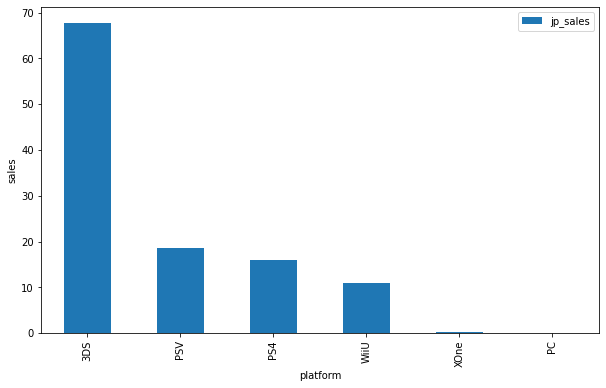

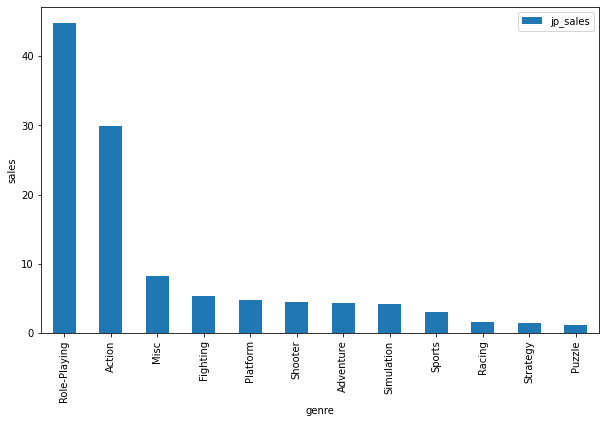

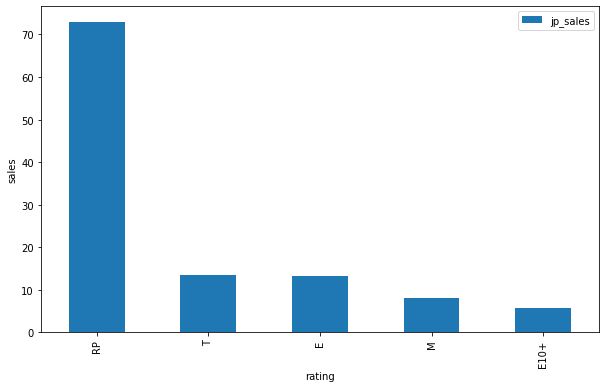

In [29]:
# Отрисовка графиков
for i in list_for_bar:
    df_act_top_platforms.pivot_table(
        index = i,
        values = 'jp_sales',
        aggfunc = 'sum'
    ).sort_values(
        by = 'jp_sales',
        ascending = False
    ).plot(
        kind = 'bar',
        figsize = (10, 6),
        xlabel = i,
        ylabel = 'sales',
    )

- топ платформ в Японии: 3DS, PS Vita, PS4, Wii U. Xbox One и PC не пользуются популярностью
- по жанрам топ: РПГ, экшн, аркады, платформеры и файтинги
- по рейтингу: без рейтинга, 16+ (Т), для всех (Е), 18+ (M), 10+ (Е10+)

#### Вывод 3
- Топы для Америки и Европы очень похожи: экшн/шутер на PS4 с рейтингом 18+.
- Для пользователей Японии характерны другие предпочтения:ролевые игры на 3DS.

### Проверка гипотез
Проверю две гипотезы:   
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
- Средние пользовательские рейтинги жанров Action и Sports разные

Начну с первой.   
**Нулевая гипотеза** - средние пользовательские рейтинги платформ XOne и PC одинаковые.   
**Алтернативная** - средние пользовательские рейтинги платформ XOne и PC различаются.

In [30]:
# Сделаю 2 выборки по платформам
xone_rat = df_act_top_platforms.query('platform == "XOne"')['user_score'].dropna().to_list()
pc_rat = df_act_top_platforms.query('platform == "PC"')['user_score'].dropna().to_list()

# Дисперсии
display(np.var(xone_rat))
display(np.var(pc_rat))

1.8965188383045526

3.016306347554631

In [31]:
alpha = .05
results = st.ttest_ind(xone_rat, pc_rat, equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не удалось отвергнуть нулевую гипотезу")

p-значение: 0.14759594013430463
Не удалось отвергнуть нулевую гипотезу


Нулевую гипотезу отвергнуть не удалось.  
   
Проверю вторую гипотезу.   
**Нулевая гипотеза** - средние пользовательские рейтинги жанров Action и Sports одинаковые.   
**Алтернативная** - средние пользовательские рейтинги жанров Action и Sports различаются.

In [32]:
# Сделаю 2 выборки по платформам
action_rat = df_act_top_platforms.query('genre == "Action"')['user_score'].dropna().to_list()
sports_rat = df_act_top_platforms.query('genre == "Sports"')['user_score'].dropna().to_list()

# Дисперсии
display(np.var(action_rat))
display(np.var(sports_rat))

1.7416009849184362

2.645630820507794

In [33]:
alpha = .05
results = st.ttest_ind(action_rat, sports_rat, equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не удалось отвергнуть нулевую гипотезу")

p-значение: 1.2678091455806196e-11
Отвергаем нулевую гипотезу


Средние пользовательские рейтинги жанров Action и Sports не одинаковые.

## Общий вывод

**Что было сделано**   
- приведены названия столбцов к единому стилю
- удалены строки с отсутствующим названием игр и неизвестной датой выхода
- заменены в пользовательской оценке значения TBD на NaN
- заполнены пропуски в рейтинге на RP (rating pending)
- посчитаны суммарные продажи   

**Выводы**   
Такое количество пропусков в оценках, думаю, связано с тем, что система оценок и рейтинги игр появились сравнительно недавно, а игры в датасете есть и весьма старые, которые не успели/не получали оценок ни пользователей ни критиков позднее.

1. С 90х годов был резкий подъем производства и продаж видеоигр. После 2008г. наблюдается сильный спад, скорее всего связанный с сильным замеделнием роста технологий. 
2. Самые популярные платформы за все время по имеющимся данным: первые три поколоения платформы PlayStation от Sony, Xbox 360 от Microsoft, Nintendo Wii и Nintendo DS. 
3. В среднем платформа актуальна 8-10 лет.
4. Существует корреляция между оценкой игры критиками и количеством продаж. 
5. Пользовательские оценки почти не влияют на продажи.
6. Рейтинг тоже не сильно, потому как очень многи игр без рейтинга.
7. Самые продаваемые жанры: Shooter, Sports, Platfrom.
8. Топ жанров для Америки и Европы очень похожи: экшн/шутер на PS4 с рейтингом 18+.
9. Топ для Японии:ролевые игры на 3DS.

Собственно, в зависимости от рынка, рекламные компании стоит проводить, ориентируясь на пп.7-8 выше.

**Гипотезы**   
Гипотезу об одинаковых средних пользовательских рейтингах платформ XBox One и PC отвергнуть не удалось.   
Гипотезу об одинаковых средних пользовательских рейтингов жанров Action и Sports отвергли.
